# prototyping machine learning project from Dermnet dataset
this note book use for make prototype model to deterrmine the best model architecture. dataset that using from kaggle.com 
this notebook design for running in google colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### description of dataset 
- 

### purpose of the notebook
-

## Install  package
- ensure that you was isntall these package. if you not intall these package yet, feel free to uncomment and execute cell below

In [ ]:
#!pip install matplotlib
#!pip install PIL
#!pip install SciPy
#!pip install sklearn
#!pip install tensorflow
#!pip install numpy
#!pip install kaggle

## download dataset
- we are already download this dataset. if you not dowload yet uncomment and execute code below. you may have to upload your kaggle.json first

In [ ]:
#!cp ~/content/kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
## copy API download dataset command  di dataset kagle, kemudian paste di sini
#!kaggle datasets download -d shubhamgoel27/dermnet

In [ ]:
# alternative dataset
#!kaggle datasets download -d paoloripamonti/derma-diseases
#https://www.kaggle.com/datasets/paoloripamonti/derma-diseases

## import libraries 

In [ ]:
# libraries for extract and pre precessing data
import os, zipfile, PIL
# libraries for machine learning model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
#libraries for preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import heapq
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MultiLabelBinarizer
#libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
# libraries for save data
import datetime


## extract dataset and split it into train and test 
dermnet.zip already  split into train and test directoy, so it just need to extract

In [ ]:
#local_zip = "/content/drive/MyDrive/new_dataset.zip"
extract_dir = "/content/dermnet_dataset"
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall(extract_dir)
#zip_ref.close()
dataset_dir=os.path.join(extract_dir,"new_dataset")
train_dir= os.path.join(dataset_dir,"train")
test_dir= os.path.join(dataset_dir,"test")

# data and image exploration
to explore feature of the image 

In [ ]:
# train, test, and number sample each label exploration
labels= os.listdir(train_dir)
print(" the model has {} labels with is \n".format(len(labels)))
for nomor, label in enumerate(labels):
    print("{} {} have {} train data samples and {} test data samples".format(nomor, 
                                                                             label, 
                                                                             len(os.listdir(os.path.join(train_dir,label))),
                                                                             len(os.listdir(os.path.join(test_dir,label)))
                                                                            )
         )
# image exploration

image_sample_dir=[os.path.join(train_dir,label) for label in labels[:5]]
for dir_ in image_sample_dir:
    for img in os.listdir(dir_)[:2]:
        im= PIL.Image.open(os.path.join(dir_, img))# pass with the picture directory
        print("image \n format :{},size: {} , color: {} \n".format(im.format,im.size,im.mode))


 the model has 74 labels with is 

0 eczema-hand have 102 train data samples and 20 test data samples
1 warts-common have 92 train data samples and 25 test data samples
2 porphyrias have 55 train data samples and 18 test data samples
3 keratolysis-exfoliativa have 43 train data samples and 8 test data samples
4 varicella have 50 train data samples and 11 test data samples
5 phototoxic-reactions have 84 train data samples and 22 test data samples
6 intertrigo have 76 train data samples and 15 test data samples
7 stucco-keratoses have 48 train data samples and 13 test data samples
8 necrobiosis-lipoidica have 72 train data samples and 12 test data samples
9 acne-pustular have 69 train data samples and 19 test data samples
10 tinea-body have 95 train data samples and 29 test data samples
11 neurofibromatosis have 53 train data samples and 16 test data samples
12 actinic-keratosis-hand have 32 train data samples and 5 test data samples
13 tinea-primary have 55 train data samples and 9 test

In [ ]:
import shutil
for label in labels:
     if len(os.listdir(os.path.join(train_dir,label)))<50:
       shutil.rmtree(os.path.join(train_dir,label))
       shutil.rmtree(os.path.join(test_dir,label))


In [ ]:
len(os.listdir(train_dir))

52

In [ ]:
def generate_class_weights(class_series):
    class_labels = np.unique(class_series)
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
    return dict(zip(class_labels, class_weights))

## preprocessing data
it will process the raw data so that can use for data training. we will use class ImageDataGenerator and flow_from_directory() method. and include augmentation( rescale, sheer, zoom, etc)

Found 4413 images belonging to 52 classes.
Found 4413 images belonging to 52 classes.
(64, 224, 224, 3)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


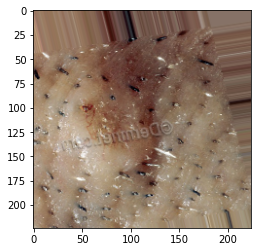

(64, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


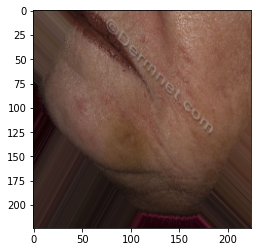

(64, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


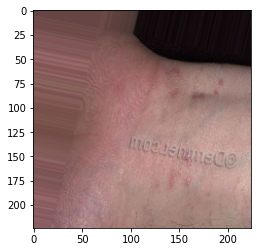

(64, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


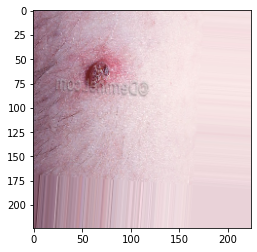

(64, 224, 224, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


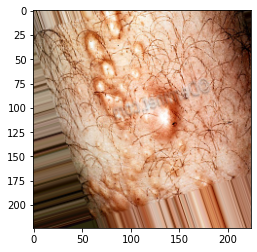

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224 # be wise to set this value
train_datagen=ImageDataGenerator(rescale=1/255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode="nearest"
                                )
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  class_mode="categorical",#edit disini)
                                                  batch_size=BATCH_SIZE
                                                 )

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator= test_datagen.flow_from_directory( train_dir,
                                                  target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                  class_mode="categorical",#edit disini)
                                                  batch_size=BATCH_SIZE
                                                )
#ploting versi image generator
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    shuffle = True,
                                                                    image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                                    batch_size = BATCH_SIZE 
                                                                   )
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   shuffle = True,
                                                                   image_size = (IMAGE_SIZE,IMAGE_SIZE),
                                                                   batch_size = BATCH_SIZE  
                                                                  )
print(train_dataset)
#class names pakek image generator
class_names = train_generator.class_indices
print(class_names)

Found 4413 files belonging to 52 classes.
Found 1165 files belonging to 52 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 360, 360, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
{'acne-cystic': 0, 'acne-open-comedo': 1, 'acne-pustular': 2, 'alopecia-areata': 3, 'basal-cell-carcinoma-lesion': 4, 'basal-cell-carcinoma-superficial': 5, 'chondrodermatitis-nodularis': 6, 'dermatofibroma': 7, 'distal-subungual-onychomycosis': 8, 'eczema-fingertips': 9, 'eczema-hand': 10, 'eczema-nummular': 11, 'eczema-subacute': 12, 'epidermal-cyst': 13, 'epidermal-nevus': 14, 'granuloma-annulare': 15, 'herpes-cutaneous': 16, 'herpes-type-1-primary': 17, 'herpes-type-1-recurrent': 18, 'herpes-zoster': 19, 'hidradenitis-suppurativa': 20, 'intertrigo': 21, 'lentigo': 22, 'lichen-planus': 23, 'lichen-simplex-chronicus': 24, 'molluscum-contagiosum': 25, 'mucous-cyst': 26, 'necrobiosis-lipoidica': 27, 'neurofibromatosis': 28, 'onycholysis': 29, 'perioral-de

TypeError: Tensor is unhashable. Instead, use tensor.ref() as the key.

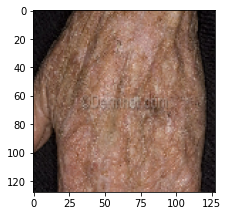

In [ ]:
plt.figure(figsize = (15,15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]],fontsize = 8)
        plt.axis("off")

In [ ]:
labels = os.listdir(train_dir)
counts = [len(os.listdir(os.path.join(train_dir, label))) for label in labels]
print(len(counts))

52


In [ ]:
train_dict = dict(zip(labels, counts))
use_label = heapq.nlargest(10, train_dict, key=train_dict.get)
train_labels = [class_names[key] for key in train_dict for val in range(train_dict[key])]
class_weight = generate_class_weights(train_labels)

## build model architecture
it will make a few different model architecture and combination layers that will train then see the performance evaluation


### first option is use pretraining model using mobilenet 
- it will be powerfull tool 

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))


Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
import tensorflow_hub as hub

In [ ]:
# tuning model. you can freeze or un freeze some layers of model
do_fine_tuning = True # assign True for unfreeze some layers

feature_extractor= hub.KerasLayer(MODULE_HANDLE,
                                  input_shape=IMAGE_SIZE+(3,),
                                  output_shape=[FV_SIZE],
                                  trainable=do_fine_tuning)
model= tf.keras.Sequential([feature_extractor,
                            tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(len(counts), activation="softmax")])

model.summary()

NUM_LAYERS = 15 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 52)                66612     
                                                                 
Total params: 2,324,596
Trainable params: 2,290,484
Non-trainable params: 34,112
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### second option is made custom model from scart

In [ ]:

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(BATCH_SIZE, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    # tf.keras.layers.Dropout(0.2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(len(labels), activation='softmax')
])
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.0001),metrics=["accuracy"])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 64)     

### model1

In [ ]:
IMAGE_SHAPE=(720,720)+(3,)
base_model=tf.keras.applications.MobileNetV2(input_shape=IMAGE_SHAPE,
                                            include_top=False,
                                            weights="imagenet",)

# freeze the top layer in base_model
base_model.trainable= True
# Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False
# build new model based on base_M0DEL
inputs= tf.keras.Input(shape=(720,720,3))
x= tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])(inputs)
x=tf.keras.applications.mobilenet_v2.preprocess_input(x)
x= base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs= tf.keras.layers.Dense(64,activation="relu")(x)
outputs=tf.keras.layers.Dense(10, activation="softmax")(outputs)

model=tf.keras.Model(inputs,outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 360, 360, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 360, 360, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 360, 360, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 360, 360, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 23, 23, 1280)     2257984   
 ional)                                                          
                                                             

### model2

In [ ]:
model2=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),#edit sesuai dengan ukuran target),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #2
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #3
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #4
                                   tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #5
                                   tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #6
                                   tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   # dropout layers
                                   tf.keras.layers.Dropout(0.2),
                                   #dense
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   tf.keras.layers.Dense(23,activation="softmax")
                                   
                                  ])
model1.compile(loss="categorical_crossentropy", optimizer=RMSprop(learning_rate=0.0001),metrics=['accuracy'])

### model3

In [ ]:
model3= tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(18,18), activation="relu",input_shape=(720,480,1)),
                                    tf.keras.layers.MaxPooling2D(8,8),
                                    #2 
                                    tf.keras.layers.Conv2D(64,(18,18),activation="relu"),
                                    tf.keras.layers.MaxPooling2D(8,8),
                                    #3
                                   tf.keras.layers.Conv2D(64,(18,18),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #4
                                   tf.keras.layers.Conv2D(128,(9,9),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #5
                                   tf.keras.layers.Conv2D(256,(9,9),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(4,4),
                                   #6
                                   tf.keras.layers.Conv2D(512,(3,3),activation="relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   # dropout layers
                                   tf.keras.layers.Dropout(0.2),
                                   #dense
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation="relu"),
                                   tf.keras.layers.Dense(23,activation="softmax")
                                   ])
model3.compile(loss="categorical_crossentropy", optimizers=Adam(learning_rate=0.00001), metrics=['accuracy'])

## train
train each model above with the same parameter 
* step_per_epoch= 10
* epoch = 100
* batch = 32
* verbose= 1

In [ ]:
#history=model.fit(train_generator,
#                  epochs=10,
 #                 class_weight=class_weight,
  #                validation_data=test_generator)
history=model.fit(train_generator,
                    epochs=25,
                    validation_data=test_generator)#fill parameter here)
#history2=model2.fit(train_generator,
 #                   steps_per_epoch=10,
  #                  epochs=100,
   #                 verbose=1,
    #                validation_data=test_generator,
     #               validation_steps=10)#fill parameter here)

# history3=model3.fit(#fill parameter here)

Epoch 1/25
69/69 [==============================] - 109s 2s/step - loss: 3.5923 - accuracy: 0.1487 - val_loss: 3.4884 - val_accuracy: 0.1502
Epoch 2/25
69/69 [==============================] - 104s 2s/step - loss: 2.3553 - accuracy: 0.4043 - val_loss: 2.5338 - val_accuracy: 0.3383
Epoch 3/25
69/69 [==============================] - 103s 1s/step - loss: 1.8135 - accuracy: 0.5321 - val_loss: 1.7394 - val_accuracy: 0.5269
Epoch 4/25
69/69 [==============================] - 104s 2s/step - loss: 1.5152 - accuracy: 0.5971 - val_loss: 1.4945 - val_accuracy: 0.5849
Epoch 5/25
69/69 [==============================] - 108s 2s/step - loss: 1.2870 - accuracy: 0.6592 - val_loss: 1.0910 - val_accuracy: 0.7068
Epoch 6/25
69/69 [==============================] - 110s 2s/step - loss: 1.1005 - accuracy: 0.7068 - val_loss: 1.0914 - val_accuracy: 0.7086
Epoch 7/25
69/69 [==============================] - 110s 2s/step - loss: 0.9369 - accuracy: 0.7566 - val_loss: 1.0098 - val_accuracy: 0.7303
Epoch 8/25
69

## build function for plot the peformace per epoch 
function perform_plot will plot the performance per epoch then will passed by history then it will reusable

In [ ]:
def perform_plot(history):
    #edit here
    """
    this function use for plot model performance i.e loss and accuracy from train and validation data
    this plot will used for evaluate model performance and check overfitting
    """
    #plot the model result
    accuracy=history.history['accuracy']
    validation_accuracy=history.history['val_accuracy']
    loss= history.history['loss']
    validation_loss=history.history['val_loss']
    
    epoch=range(len(accuracy))
    
    #plot accuracy
    plt.plot(epoch,accuracy,'r',label="Training accuracy")
    plt.plot(epoch,validation_accuracy,'b',label="Validation accuracy")
    plt.title("Training and Validation accuracy")
    plt.legend()
    
    plt.figure()
    plt.plot(epoch,loss,'r',label="Training loss")
    plt.plot(epoch,validation_loss,'b', label="Validation loss")
    plt.title("training and validation loss")
    
    plt.legend()
    plt.show()

## evaluate each model
plot the models performance then evaluate the best model. and make sure that validation accuracy greater than 80. if not, make a new model architecure

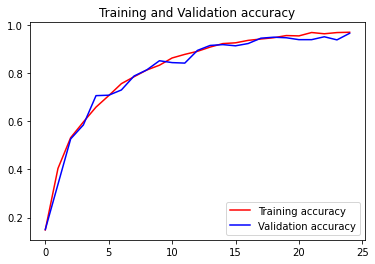

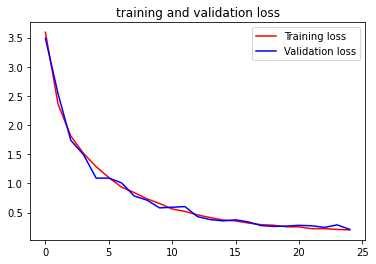

In [ ]:
#history= [ history1, history2]
#for hist in history:
 #   perform_plot(hist)
  #  plt.figure()
perform_plot(history)

## save weight and bin file from the best model
this bin and wight file will used for next process in this project( tranfer learning)

In [ ]:
# save weight model
model.save("97P- model.h5")

## save models, convert to tf.lite, and save tf lite model 

export the save model

In [ ]:

export_dir = 'saved_model/2'# edit jadi path drive
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/2/assets


INFO:tensorflow:Assets written to: saved_model/2/assets


In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

convert model to tensorflow lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
# save tensorflow lite model
#tflite_model_file = pathlib.Path('model.tflite')
#tflite_model_file.write_bytes(tflite_model)
tflite_model_file = '97P-model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
with zipfile.ZipFile("97P-model.zip","w") as zip:
  zip.write("/content/saved_model")
  zip.write("/content/97P- model.h5")
  zip.write("/content/97P-model.tflite")
  zip.write("/content/labels.txt")

## Test the TFLite Model Using the Python Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
predictions = []

test_labels, test_imgs = [], []
for img, label in test_generator:
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

ValueError: ignored

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

class_names = labels

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    print(type(predicted_label), type(true_label))
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:9, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

create fie for save labels

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

## Prepare the Test Images for Download 

In [ ]:
!mkdir -p test_images

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')
loaded_model = keras.models.load_model('/content/ckpt/best3.h5')

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(50)):
    image = tf.cast(image * 255.0, tf.uint8)
    image = tf.squeeze(image).numpy()
    pil_image = Image.fromarray(image)
    pil_image.save('test_images/{}_{}.jpg'.format(class_names[label[0]], index))

In [ ]:
!ls test_images
!zip -qq rps_test_images.zip -r test_images/

In [ ]:
try:
    files.download('rps_test_images.zip')
except:
    pass